In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from olympus.emulators import Emulator
from olympus.scalarizers import Scalarizer

from olympus.utils.misc import get_hypervolume

In [15]:
emulator_i = Emulator(dataset='suzuki_i', model='BayesNeuralNet')
emulator_ii = Emulator(dataset='suzuki_ii', model='BayesNeuralNet')
emulator_iii = Emulator(dataset='suzuki_iii', model='BayesNeuralNet')
emulator_iv = Emulator(dataset='suzuki_iv', model='BayesNeuralNet')

[INFO] Loading emulator using a BayesNeuralNet model for the dataset suzuki_i...


/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:98: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:108: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


[INFO] Loading emulator using a BayesNeuralNet model for the dataset suzuki_ii...


/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:98: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:108: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


[INFO] Loading emulator using a BayesNeuralNet model for the dataset suzuki_iii...


/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:98: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:108: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


[INFO] Loading emulator using a BayesNeuralNet model for the dataset suzuki_iv...


/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:98: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
/Users/rileyhickman/mambaforge/envs/atlas_aag/lib/python3.10/site-packages/tensorflow_probability/python/layers/util.py:108: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(


In [16]:
print(emulator_i.param_space)

Categorical (name='ligand', num_opts: 8, options=['L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7'], descriptors=[None, None, None, None, None, None, None, None])
Continuous (name='res_time', low=60.0, high=600.0, is_periodic=False)
Continuous (name='temperature', low=30.0, high=110.0, is_periodic=False)
Continuous (name='catalyst_loading', low=0.498, high=2.515, is_periodic=False)


In [24]:
# generate design points
cat_options = ['L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']

NUM_POINTS = 10000

X = []

for _ in range(NUM_POINTS):
    X_ = []
    X_.append(np.random.choice(cat_options, size=None))
    X_.append(np.random.uniform(60., 600., size=None))
    X_.append(np.random.uniform(30., 110., size=None))
    X_.append(np.random.uniform(0.498, 2.515, size=None))
    X.append(X_)

In [25]:
y_i, _, __= emulator_i.run(X)
y_ii, _, __= emulator_ii.run(X)
y_iii, _, __= emulator_iii.run(X)
y_iv, _, __= emulator_iv.run(X)

[WARNING] Not all parameters of ['L5', 146.85203230416784, 38.10825400865375, 2.5147039326869365] are within bounds!
[WARNING] Not all parameters are within bounds
[WARNING] Not all parameters of ['L6', 292.9423010179735, 60.138234279162575, 2.5135282813631044] are within bounds!
[WARNING] Not all parameters are within bounds
[WARNING] Not all parameters of ['L3', 372.9364882483557, 52.044776104833126, 0.4982928002408879] are within bounds!
[WARNING] Not all parameters are within bounds
[WARNING] Not all parameters of ['L3', 197.29261511064192, 58.12831219555566, 2.514132695737998] are within bounds!
[WARNING] Not all parameters are within bounds
[WARNING] Not all parameters of ['L6', 427.38981048236104, 108.82620816582266, 2.5131987179204067] are within bounds!
[WARNING] Not all parameters are within bounds
[WARNING] Not all parameters of ['L1', 396.60558423350557, 109.45028615079858, 2.5144812707876554] are within bounds!
[WARNING] Not all parameters are within bounds
[WARNING] Not a

In [26]:
y = np.stack((y_i, y_ii, y_iii, y_iv), axis=-2)
y.shape

(10000, 4, 2)

In [27]:
y_mean = np.mean(y,axis=-2)
y_mean.shape

(10000, 2)

In [28]:
# compute average hypervolume for each point
# merits = scalarizer.scalarize(y_mean)
# print(merits.shape)
# best_idx = np.argmin(merits)
# print(merits[best_idx])
# print(y_mean[best_idx])
# best_X = X[best_idx]
# print(best_X)
w_ref = np.array([-0., -0.])

merits = get_hypervolume(-y_mean, w_ref)
merits

5565.551219834783

## Analyze results

In [51]:
res_gen = pickle.load(open('general_results.pkl', 'rb'))
res_full = pickle.load(open('full_obj_results.pkl', 'rb'))
len(res_gen), len(res_full)

(10, 20)

In [52]:
w_ref = np.array([-0., -0.])

hvols_gen = []
hvols_full = []
# compute hypervolumes after experiment terminated
for res in res_gen:
    hvol = get_hypervolume(-res[['yield', 'turnover']].values, w_ref)
    hvols_gen.append(hvol)
for res in res_full:
    hvol = get_hypervolume(-res[['yield', 'turnover']].values, w_ref)
    hvols_full.append(hvol)
    
plot_df = pd.DataFrame({
    'strategy': ['general' for _ in range(len(res_gen))] + ['full_obj' for _ in range(len(res_full))],
    'hvol': hvols_gen+hvols_full,
})

max_, min_ = plot_df['hvol'].max(), plot_df['hvol'].min()
print(max_, min_)
plot_df['norm_hvol'] = (plot_df['hvol'] - min_) /(max_-min_)

3465.4790852908045 148.1312120166325


<Axes: xlabel='strategy', ylabel='hvol'>

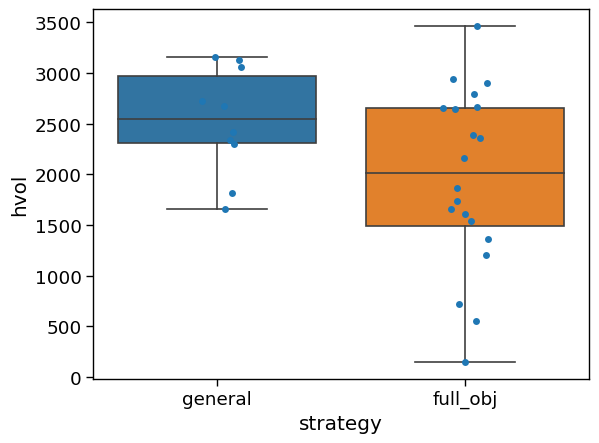

In [53]:
fig, ax = plt.subplots()

sns.boxplot(data=plot_df, x='strategy', y='hvol', ax=ax)
sns.stripplot(data=plot_df, x='strategy', y='hvol', ax=ax)

#ax.axhline(merits, c='k', ls='--', alpha=0.5)

<Axes: xlabel='strategy', ylabel='norm_hvol'>

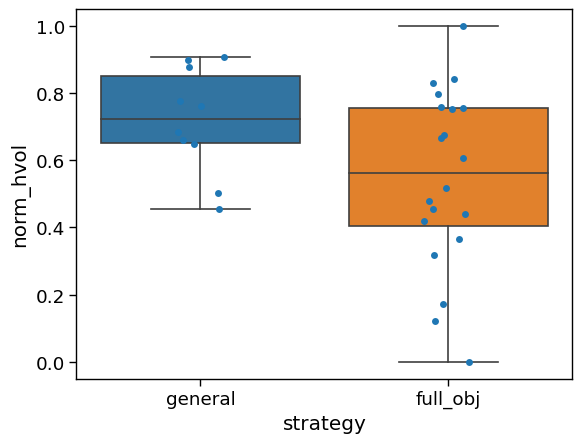

In [54]:
fig, ax = plt.subplots()

sns.boxplot(data=plot_df, x='strategy', y='norm_hvol', ax=ax)
sns.stripplot(data=plot_df, x='strategy', y='norm_hvol', ax=ax)

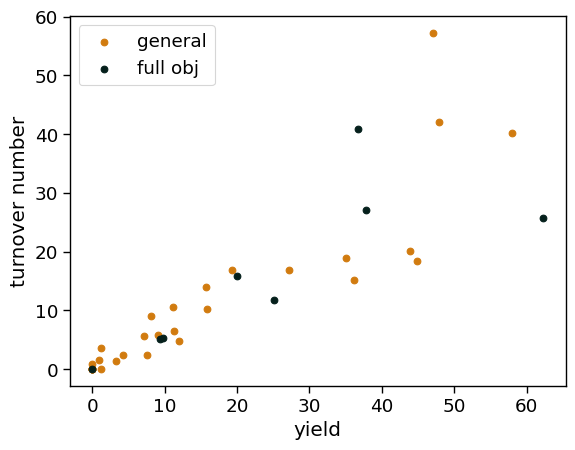

In [42]:
fig, ax = plt.subplots()

run_ix = 2
obj_gen = res_gen[run_ix][['yield', 'turnover']].values
obj_full = res_full[run_ix][['yield', 'turnover']].values

ax.scatter(obj_gen[:,0], obj_gen[:,1], c='#D17B0F', label='general')
ax.scatter(obj_full[:,0], obj_full[:,1], c='#05201c', label='full obj')

ax.set_xlabel('yield')
ax.set_ylabel('turnover number')

ax.legend()

In [7]:
res_full[3]

,ligand,res_time,temperature,catalyst_loading,yield,turnover
0,L6,347.8722271633963,56.57927201814378,1.7929186343279941,2.936673,1.277719
1,L5,473.10093526724694,71.64951283622254,2.177523619819587,11.068687,3.693981
2,L1,361.25871090328855,108.62646678420101,0.822652973083017,35.568665,41.557316
3,L6,185.15648904664425,103.59050010597421,1.6338786283842317,30.104570,12.589710
4,L1,507.4591583620329,85.69031561819514,1.927204743619781,43.400352,20.169090
5,L1,220.57748325927471,109.9997834221465,0.49801115557028985,20.904367,52.529768
6,L1,421.7947036872011,109.99842524449897,2.018741059368944,58.357237,28.451304
7,L1,599.9979454132231,109.99986274789684,2.3645272835691524,58.201728,25.721670
